Jupyter Notebook for Wintertime Climatological Variables for Philadelphia PA

Read in hourly observations from a 30-year period and select those only occurring during winter (i.e. Dec, Jan, Feb). Plots are then made for different parameters.

In [1]:
% matplotlib notebook
import pandas as pd
import numpy as N
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import datetime as dt

In [2]:
in_df = pd.read_csv("G:\\informatics\\hourly_obs_cleaned_1980_2009_v2.csv",na_values=" ")

In [3]:
# index dataframe for observations of [a] certain month(s)
dts = pd.to_datetime(in_df["Date"], format = '%Y%m%d')
in_df.index = dts

In [4]:
# make separate dfs for winter months
df_dec = in_df.iloc[(in_df.index.month ==12)]
df_jan = in_df.iloc[(in_df.index.month == 1)]
df_feb = in_df.iloc[(in_df.index.month == 2)]

In [5]:
# calculate average daily temperatures for each day using pandas groupby function
t_dec = df_dec['TEMP'].groupby(df_dec['Date']).mean()
t_jan = df_jan['TEMP'].groupby(df_jan['Date']).mean()
t_feb = df_feb['TEMP'].groupby(df_feb['Date']).mean()

<IPython.core.display.Javascript object>


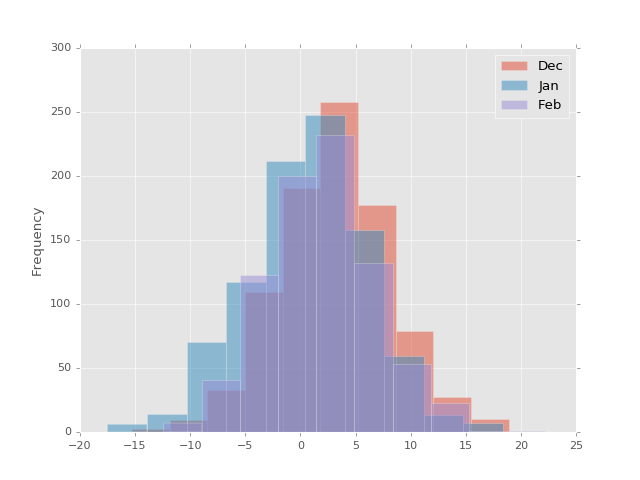

In [6]:
# distribution of mean daily temperatures by month
t_dec.plot.hist(alpha=0.5,legend=True,label='Dec')
t_jan.plot.hist(alpha=0.5,legend=True,label='Jan')
t_feb.plot.hist(alpha=0.5,legend=True,label='Feb')
plt.show()

This is a figure of mean daily temperature for each month as a histogram. This allows us to see the distribution of mean daily temperature as well as see how this distribution varies during the winter. In this case, the distribution of temperature is generally higher in December than January and February. Furthermore, January is usually the cooler month of the three. 

<IPython.core.display.Javascript object>


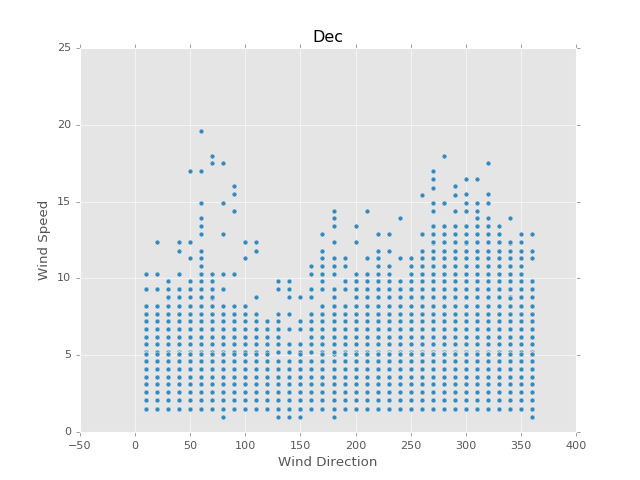

<IPython.core.display.Javascript object>


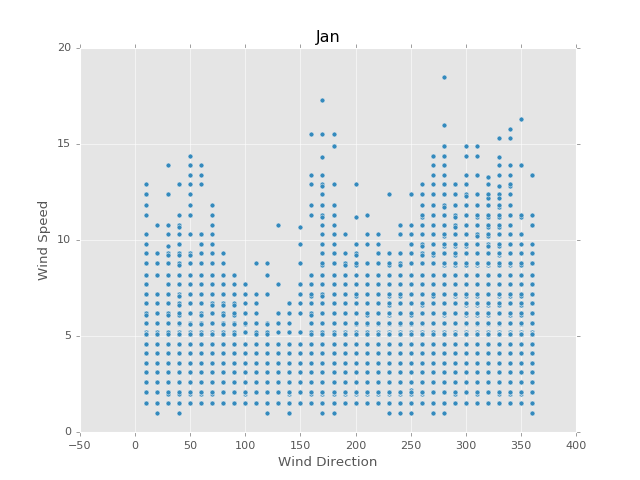

<IPython.core.display.Javascript object>


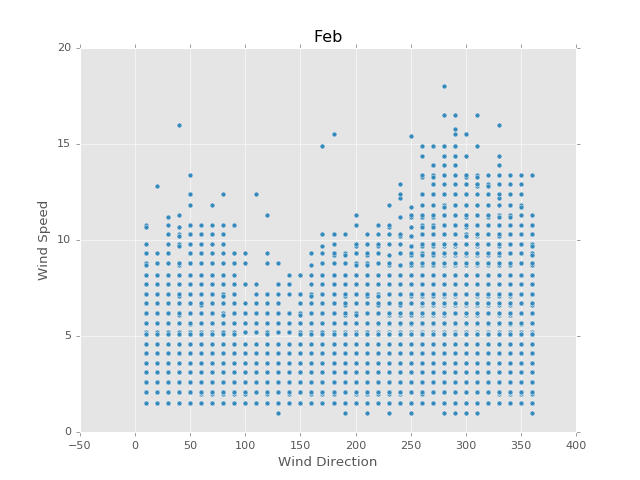

In [103]:
# plot wind speed as a function of wind direction
df_dec.plot.scatter(x='Wind Direction',y='Wind Speed',title='Dec')
df_jan.plot.scatter(x='Wind Direction',y='Wind Speed',title='Jan')
df_feb.plot.scatter(x='Wind Direction',y='Wind Speed',title='Feb')

Each scatter plot shows the relationship between hourly wind direction and wind speed for each month during the winter. Wind direction is read on a polar coordinate system, so 0 deg is N, 90 is E, 180 is S, and 270 is W. From these plots, strong winds generally seem to come from the NW. However, the month of January tends to see strong wind coming from the south. Interestingly, it looks like there is a density problem with the data which sparks the questions: how dense is the data, and how frequent are some of these observations?

<IPython.core.display.Javascript object>


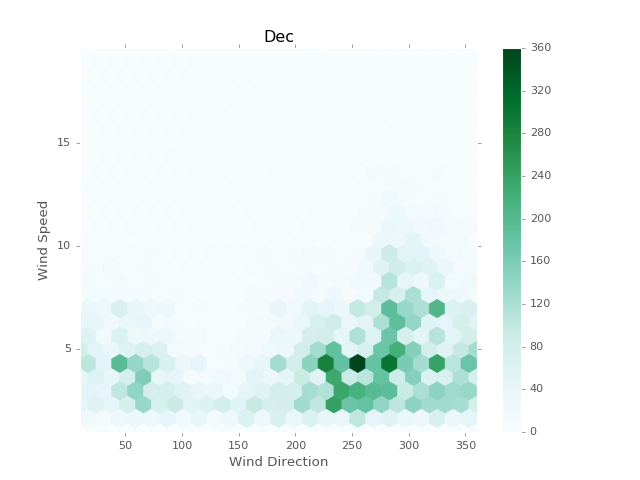

<IPython.core.display.Javascript object>


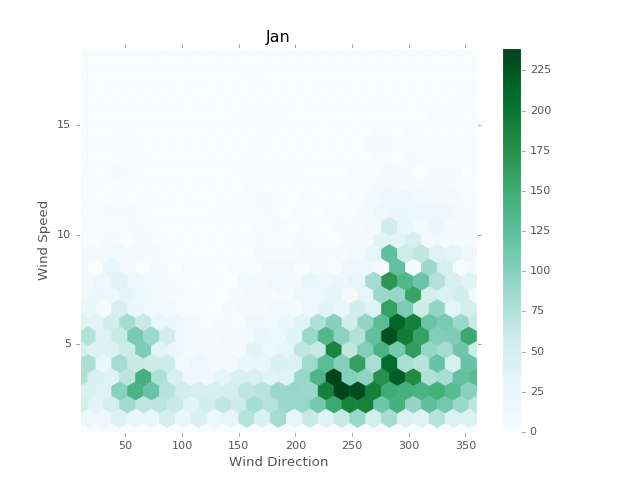

<IPython.core.display.Javascript object>


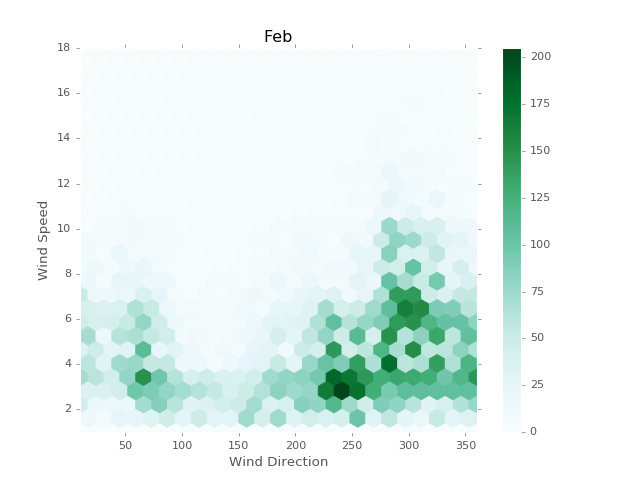

In [7]:
# re-plot wind scatter plots as hex-bin plots to account for data density, since hourly measurements are used
df_dec.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Dec')
df_jan.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Jan')
df_feb.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Feb')

Using the hexbin plot, we can still look at the relationship between hourly wind speed and direction, as well considering the density of the data to determine the frequency of these types of observations. In doing so, we can see that it is quite common to see hourly wind speeds between 2-6 meters per second coming from the SW (240 deg) and somewhat stronger winds coming from the NW (around 300 deg). This pattern is apparent in all three months. It is also interesting that December typically sees lower hourly wind speeds than in January and February.

<IPython.core.display.Javascript object>


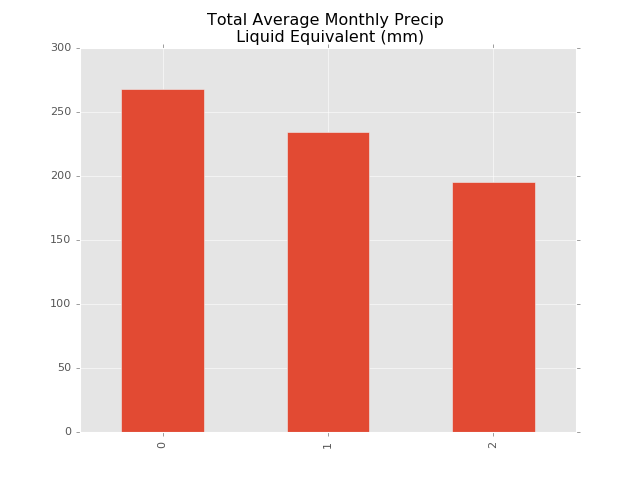

In [107]:
# plot monthly average total precipitation over 30-year period from hourly precipitation totals
prec_dec = N.array((df_dec['liq precip amt #1'].sum())/30)
prec_jan = N.array((df_jan['liq precip amt #1'].sum())/30)
prec_feb = N.array((df_feb['liq precip amt #1'].sum())/30)

prec = pd.DataFrame([prec_dec,prec_jan,prec_feb],columns= ['Total Avg Precip'])
prec.plot.bar(legend=False, title='Total Average Monthly Precip \n Liquid Equivalent (mm)')

In order to see which month typically sees more precipitation, average total precipitation is calculated and plotted as a bar graph for December, January, and February, respectively. December tends to see more precipitation on average, and February tends to see the least. 